In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   Total_Amount                 68654 non-null  float64
 7   Total_Amount_to_Repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  New_versus_Repeat            68654 non-null  object 
 12  Amount_Funded_By_Lender      68654 non-null  float64
 13  Lender_portion_F

In [4]:
df.head(3)

,ID,customer_id,country_id,tbl_loan_id,lender_id,loan_type,Total_Amount,Total_Amount_to_Repay,disbursement_date,due_date,duration,New_versus_Repeat,Amount_Funded_By_Lender,Lender_portion_Funded,Lender_portion_to_be_repaid,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,8448.0,8448.0,2022-08-30,2022-09-06,7,Repeat Loan,120.85,0.014305,121.0,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,25895.0,25979.0,2022-07-30,2022-08-06,7,Repeat Loan,7768.50,0.300000,7794.0,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,6900.0,7142.0,2024-09-06,2024-09-13,7,Repeat Loan,1380.00,0.200000,1428.0,0


In [5]:
df.rename(columns={'ID':'id', 'Total_Amount':'total_amount', 'Total_Amount_to_Repay':'total_amount_to_repay', 'New_versus_Repeat':'new_versus_repeat',  
                   'Amount_Funded_By_Lender':'amount_funded_by_lender', 'Lender_portion_Funded':'lender_portion_funded',
                   'Lender_portion_to_be_repaid':'lender_portion_to_be_repaid'}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           68654 non-null  object 
 1   customer_id                  68654 non-null  int64  
 2   country_id                   68654 non-null  object 
 3   tbl_loan_id                  68654 non-null  int64  
 4   lender_id                    68654 non-null  int64  
 5   loan_type                    68654 non-null  object 
 6   total_amount                 68654 non-null  float64
 7   total_amount_to_repay        68654 non-null  float64
 8   disbursement_date            68654 non-null  object 
 9   due_date                     68654 non-null  object 
 10  duration                     68654 non-null  int64  
 11  new_versus_repeat            68654 non-null  object 
 12  amount_funded_by_lender      68654 non-null  float64
 13  lender_portion_f

#### Initial EDA of some varialbles

In [7]:
df.describe()

,customer_id,tbl_loan_id,lender_id,total_amount,total_amount_to_repay,duration,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid,target
count,68654.000000,68654.000000,68654.000000,6.865400e+04,6.865400e+04,68654.000000,6.865400e+04,68654.000000,6.865400e+04,68654.000000
mean,254390.256780,263056.266248,266420.528462,1.483683e+04,1.563993e+04,8.544586,2.545663e+03,0.218679,2.652621e+03,0.018324
std,26642.719918,39486.661487,3590.999004,1.416499e+05,1.650784e+05,13.343145,1.192272e+04,0.129832,1.338006e+04,0.134120
min,145.000000,101323.000000,245684.000000,2.000000e+00,0.000000e+00,1.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,248945.750000,233942.250000,267278.000000,2.295000e+03,2.329000e+03,7.000000,2.340000e+02,0.118712,2.390000e+02,0.000000
50%,255361.000000,260305.500000,267278.000000,5.249000e+03,5.325000e+03,7.000000,9.150000e+02,0.300000,9.340000e+02,0.000000
75%,262269.250000,286962.750000,267278.000000,1.145000e+04,1.165000e+04,7.000000,2.272650e+03,0.300000,2.317000e+03,0.000000
max,312737.000000,375320.000000,267278.000000,2.300000e+07,2.541500e+07,1096.000000,1.600000e+06,1.168119,1.821338e+06,1.000000


In [8]:
#count of defaulting and non defaulting customers
df.groupby('target')['id'].count().sort_values(ascending=False)

target
0    67396
1     1258
Name: id, dtype: int64

In [9]:
# checking for duplicate rows
duplicates_exist = df.duplicated().any()
duplicates_exist

False

In [10]:
# duplicates in specific columns
df.duplicated(subset=['id']).sum()

0

In [11]:
# duplicates in specific columns
df.duplicated(subset=['customer_id']).sum()

62114

In [12]:
len(df['customer_id'].unique())

6540

The total number of distinct customers is 6540, some of whom have taken multiple loans amounting to 62114 entries.

In [13]:
#distribution of data on the number of loans by customer
df.groupby('customer_id')['id'].count().sort_values(ascending=False).describe()

count    6540.000000
mean       10.497554
std        12.977429
min         1.000000
25%         2.000000
50%         6.000000
75%        14.000000
max       208.000000
Name: id, dtype: float64

The data is right skewed with many customers having few loan transactions and a few customers having very many transactions

In [14]:
#loan counts per customer
loan_per_customer_df = df.groupby('customer_id')['id'].count().sort_values(ascending=False).reset_index(name='count')
loan_per_customer_df

,customer_id,count
0,247613,208
1,250874,192
2,259757,135
3,255356,128
4,249457,119
...,...,...
6535,259086,1
6536,259057,1
6537,259054,1
6538,258985,1


In [15]:
#customers with one loan transaction
len(loan_per_customer_df.query('count == 1'))

1212

In [16]:
# duplicates in specific columns
df.duplicated(subset=['tbl_loan_id']).sum()

2134

In [17]:
loan_id_duplicates = df[df.duplicated(subset=['tbl_loan_id'], keep=False)].sort_values('tbl_loan_id').reset_index(drop=True)
loan_id_duplicates.head(6)

,id,customer_id,country_id,tbl_loan_id,lender_id,loan_type,total_amount,total_amount_to_repay,disbursement_date,due_date,duration,new_versus_repeat,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid,target
0,ID_248648126311251804,248648,Kenya,126311,251804,Type_5,40700.0,42835.0,2022-03-14,2022-03-28,14,Repeat Loan,4980.0,0.122359,5241.0,0
1,ID_248648126311245684,248648,Kenya,126311,245684,Type_5,40700.0,42835.0,2022-03-14,2022-03-28,14,Repeat Loan,10000.0,0.245700,10525.0,0
2,ID_244985126314245684,244985,Kenya,126314,245684,Type_5,28000.0,29500.0,2022-03-14,2022-03-28,14,Repeat Loan,10000.0,0.357143,10536.0,0
3,ID_244985126314251804,244985,Kenya,126314,251804,Type_5,28000.0,29500.0,2022-03-14,2022-03-28,14,Repeat Loan,3440.0,0.122857,3624.0,0
4,ID_249613126316245684,249613,Kenya,126316,245684,Type_5,17000.0,17950.0,2022-03-14,2022-03-28,14,Repeat Loan,10000.0,0.588235,10559.0,0
5,ID_249613126316251804,249613,Kenya,126316,251804,Type_5,17000.0,17950.0,2022-03-14,2022-03-28,14,Repeat Loan,600.0,0.035294,634.0,0


The most probable cause for duplicates in the tbl_loan_id column is different lenders servicing the same loan

In [18]:
#loan_id_duplicates.to_csv('loan_id_duplicates.csv')

In [19]:
loan_id_duplicates.query('target == 1').head(8)

,id,customer_id,country_id,tbl_loan_id,lender_id,loan_type,total_amount,total_amount_to_repay,disbursement_date,due_date,duration,new_versus_repeat,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid,target
46,ID_267021188907251804,267021,Kenya,188907,251804,Type_5,9000.0,10145.0,2022-06-15,2022-06-29,14,Repeat Loan,1200.00,0.133333,1353.0,1
47,ID_267021188907267278,267021,Kenya,188907,267278,Type_5,9000.0,10145.0,2022-06-15,2022-06-29,14,Repeat Loan,1200.00,0.133333,1353.0,1
62,ID_259630191477251804,259630,Kenya,191477,251804,Type_6,7130.0,7809.0,2022-06-15,2022-06-22,7,Repeat Loan,678.65,0.095182,743.0,1
63,ID_259630191477267278,259630,Kenya,191477,267278,Type_6,7130.0,7809.0,2022-06-15,2022-06-22,7,Repeat Loan,1140.00,0.159888,1249.0,1
94,ID_267133195380267278,267133,Kenya,195380,267278,Type_5,9500.0,10486.0,2022-06-20,2022-07-04,14,New Loan,1266.00,0.133263,1397.0,1
95,ID_267133195380251804,267133,Kenya,195380,251804,Type_5,9500.0,10486.0,2022-06-20,2022-07-04,14,Repeat Loan,1266.00,0.133263,1397.0,1
96,ID_241206195402267278,241206,Kenya,195402,267278,Type_4,15000.0,19340.0,2022-06-20,2022-07-20,30,Repeat Loan,2000.00,0.133333,2579.0,1
97,ID_241206195402251804,241206,Kenya,195402,251804,Type_4,15000.0,19340.0,2022-06-20,2022-07-20,30,Repeat Loan,2000.00,0.133333,2579.0,1


Out of the 4268 observations of duplicating tbl_loan_ids, defaulted loans were 354, a percentage of 8.3% which is bigger than the overall percentage of defaulted loans of 1.8%

In [20]:
df_defaulted = df.query('target == 1').reset_index(drop=True)
df_non_defaulted = df.query('target == 0').reset_index(drop=True)

In [21]:
print(df_defaulted['total_amount'].describe())
print(df_non_defaulted['total_amount'].describe())

count    1.258000e+03
mean     1.040456e+05
std      8.538135e+05
min      2.100000e+02
25%      4.203500e+03
50%      9.000000e+03
75%      2.545825e+04
max      2.300000e+07
Name: total_amount, dtype: float64
count    6.739600e+04
mean     1.317168e+04
std      8.179969e+04
min      2.000000e+00
25%      2.280000e+03
50%      5.245000e+03
75%      1.132200e+04
max      1.500000e+07
Name: total_amount, dtype: float64


In [22]:
print(df_defaulted['total_amount_to_repay'].describe())
print(df_non_defaulted['total_amount_to_repay'].describe())

count    1.258000e+03
mean     1.208664e+05
std      9.735093e+05
min      3.580000e+02
25%      4.979000e+03
50%      1.104700e+04
75%      3.339800e+04
max      2.541500e+07
Name: total_amount_to_repay, dtype: float64
count    6.739600e+04
mean     1.367579e+04
std      9.936213e+04
min      0.000000e+00
25%      2.312000e+03
50%      5.279000e+03
75%      1.150000e+04
max      1.974894e+07
Name: total_amount_to_repay, dtype: float64


In [23]:
print(df_defaulted['new_versus_repeat'].describe())
print(df_non_defaulted['new_versus_repeat'].describe())

count            1258
unique              2
top       Repeat Loan
freq             1139
Name: new_versus_repeat, dtype: object
count           67396
unique              2
top       Repeat Loan
freq            66948
Name: new_versus_repeat, dtype: object


In [24]:
print(df_defaulted['disbursement_date'].describe())
print(df_non_defaulted['disbursement_date'].describe())

count           1258
unique           404
top       2022-08-01
freq              24
Name: disbursement_date, dtype: object
count          67396
unique           743
top       2022-07-16
freq             933
Name: disbursement_date, dtype: object


In [25]:
print(df_defaulted['due_date'].describe())
print(df_non_defaulted['due_date'].describe())

count           1258
unique           440
top       2022-08-08
freq              25
Name: due_date, dtype: object
count          67396
unique           844
top       2022-07-23
freq             935
Name: due_date, dtype: object


In [26]:
print(df_defaulted['duration'].describe())
print(df_non_defaulted['duration'].describe())

count    1258.000000
mean       27.089825
std        51.376803
min         7.000000
25%         7.000000
50%         7.000000
75%        30.000000
max       366.000000
Name: duration, dtype: float64
count    67396.000000
mean         8.198424
std         11.206779
min          1.000000
25%          7.000000
50%          7.000000
75%          7.000000
max       1096.000000
Name: duration, dtype: float64


In [27]:
print(df_defaulted['amount_funded_by_lender'].describe())
print(df_non_defaulted['amount_funded_by_lender'].describe())

count    1.258000e+03
mean     1.143332e+04
std      6.383674e+04
min      6.800000e-01
25%      7.457500e+02
50%      1.721100e+03
75%      6.068000e+03
max      1.600000e+06
Name: amount_funded_by_lender, dtype: float64
count     67396.000000
mean       2379.768056
std        8203.450725
min           0.000000
25%         227.700000
50%         900.000000
75%        2240.700000
max      850000.000000
Name: amount_funded_by_lender, dtype: float64


#### Investigating Lender ID

In [28]:
columns = ['lender_id', 'loan_type']
for column in columns:
    unique_values = df[column].unique()
    value_no = len(unique_values)
    print(f"The unique values in the column of '{column}' are {value_no}")

The unique values in the column of 'lender_id' are 4
The unique values in the column of 'loan_type' are 22


There are four different lenders offering a variety of upto 22 loan types

In [29]:
#count of loans offered by different lenders
loan_count_by_lender = df.groupby('lender_id').size().reset_index(name='count')
print(loan_count_by_lender)

   lender_id  count
0     245684    188
1     251804   3542
2     267277    271
3     267278  64653


In [30]:
#count of defaulting by different lenders
defaulting_by_lender = df.groupby(['lender_id', 'target'])['id'].count().reset_index(name='count')
print(defaulting_by_lender)

   lender_id  target  count
0     245684       0    110
1     245684       1     78
2     251804       0   3226
3     251804       1    316
4     267277       0    191
5     267277       1     80
6     267278       0  63869
7     267278       1    784


In [31]:
#total loans per lender
total_loans_per_lender = defaulting_by_lender.groupby('lender_id')['count'].transform('sum')
defaulting_by_lender['percentage'] = ((defaulting_by_lender['count'] / total_loans_per_lender) * 100).round(1)

print(defaulting_by_lender)

   lender_id  target  count  percentage
0     245684       0    110        58.5
1     245684       1     78        41.5
2     251804       0   3226        91.1
3     251804       1    316         8.9
4     267277       0    191        70.5
5     267277       1     80        29.5
6     267278       0  63869        98.8
7     267278       1    784         1.2


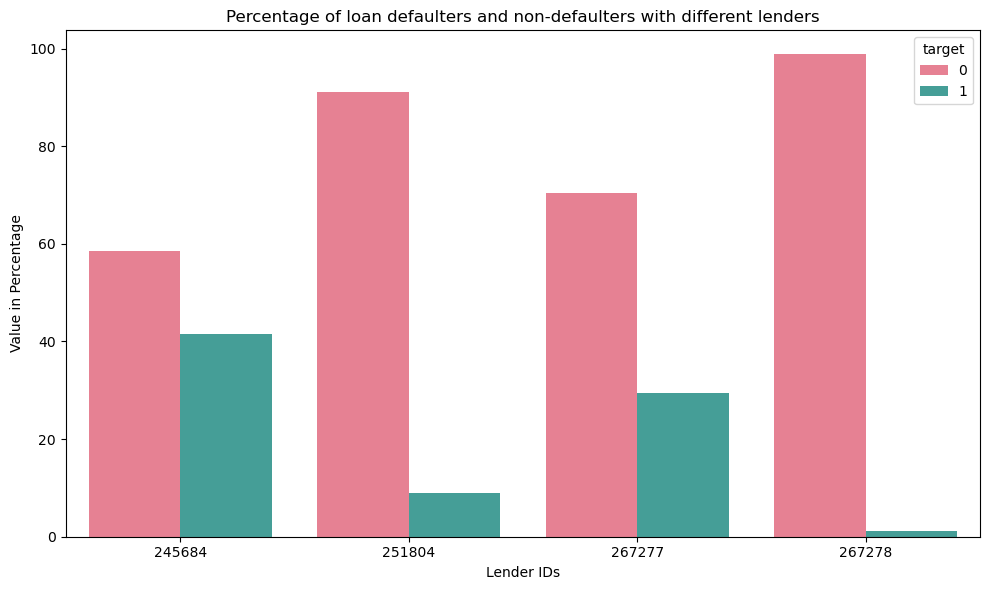

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(data=defaulting_by_lender,
            x = 'lender_id',
            y = 'percentage',
            hue = 'target',
            palette = 'husl')
plt.title('Percentage of loan defaulters and non-defaulters with different lenders', fontsize=12)
plt.xlabel('Lender IDs',fontsize=10)
plt.ylabel('Value in Percentage', fontsize=10)
plt.tight_layout()
plt.show()

In [33]:
#testing the association between these two categorical variables using a chi-square test for independence
contingency_table = pd.crosstab(df['lender_id'], df['target'])
print(contingency_table)

target         0    1
lender_id            
245684       110   78
251804      3226  316
267277       191   80
267278     63869  784


In [34]:
from scipy.stats import chi2_contingency
contingency_table = pd.DataFrame({
    0: [110, 3226, 191, 63869],
    1: [78, 316, 80, 784]
}, index=['245684', '251804', '267277', '267278'])

chi2, p, dof, expected = chi2_contingency(contingency_table)
print("Expected Frequencies:")
print(expected)

Expected Frequencies:
[[1.84555132e+02 3.44486847e+00]
 [3.47709721e+03 6.49027879e+01]
 [2.66034259e+02 4.96574125e+00]
 [6.34683134e+04 1.18468660e+03]]


##### Chi-square test can't work because some of the expected frequencies are below 5

In [35]:
#using fisher's exact test
import itertools
import scipy.stats as stats

# Create a contingency table for each lender
lender_table = df.groupby(['lender_id', 'target'])['id'].count().unstack(fill_value=0)

# Generate all possible pairs of lenders
lender_pairs = list(itertools.combinations(lender_table.index, 2))

# Store results
results = []

# Iterate through each pair of lenders and perform Fisher's Exact Test
for lender1, lender2 in lender_pairs:
    # Contingency table for the pair
    contingency_table = [
        [lender_table.loc[lender1, 0], lender_table.loc[lender1, 1]],
        [lender_table.loc[lender2, 0], lender_table.loc[lender2, 1]],
    ]
    
    # Perform Fisher's Exact Test
    odds_ratio, p_value = stats.fisher_exact(contingency_table)
    
    # Append results
    results.append({
        'Lender 1': lender1,
        'Lender 2': lender2,
        'Odds Ratio': odds_ratio,
        'P-value': p_value,
    })

# Convert results to a DataFrame for better visualization
results_df = pd.DataFrame(results)

# Sort results by p-value
results_df = results_df.sort_values(by='P-value')

# Display the top results
print(results_df)

   Lender 1  Lender 2  Odds Ratio        P-value
4    251804    267278    0.125315  2.592027e-144
2    245684    267278    0.017311   5.079574e-95
5    267277    267278    0.029307   2.802230e-83
0    245684    251804    0.138140   3.182402e-30
3    251804    267277    4.275963   4.586825e-20
1    245684    267277    0.590683   9.372525e-03


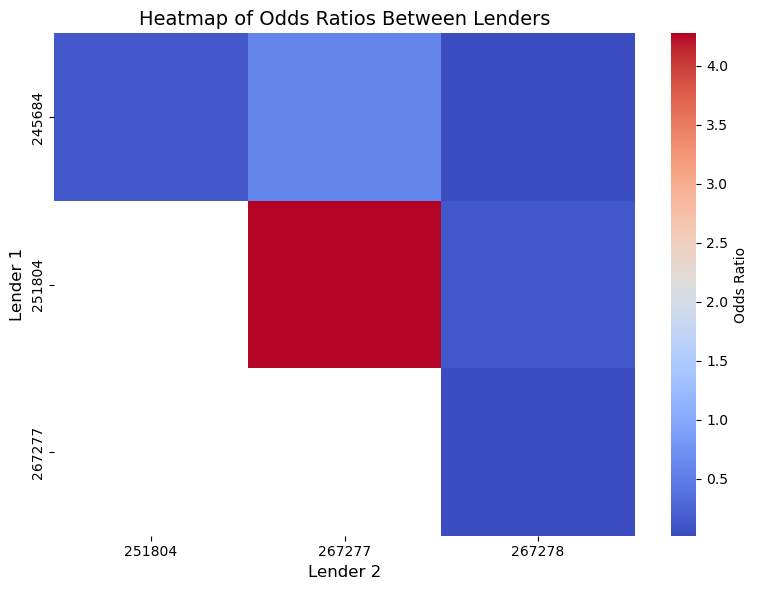

In [36]:
# Pivot data for heatmap
heatmap_data = results_df.pivot(index="Lender 1", columns="Lender 2", values="Odds Ratio")

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(
    heatmap_data,
    annot=False,
    fmt=".2f",
    cmap="coolwarm",
    cbar_kws={"label": "Odds Ratio"}
)
plt.title("Heatmap of Odds Ratios Between Lenders", fontsize=14)
plt.xlabel("Lender 2", fontsize=12)
plt.ylabel("Lender 1", fontsize=12)
plt.tight_layout()
plt.show()

#### Investigating loan types
Are some loan types deafulted more than others?

In [37]:
loan_type_count = df.groupby('loan_type')['id'].count().sort_values(ascending=False).reset_index(name='count')
print(loan_type_count)

   loan_type  count
0     Type_1  61723
1     Type_7   2790
2     Type_5   1521
3     Type_4   1235
4    Type_10    466
5     Type_6    357
6     Type_9    205
7    Type_14     99
8     Type_2     74
9    Type_11     42
10   Type_18     30
11   Type_17     23
12   Type_12     21
13   Type_23     18
14   Type_20     13
15   Type_16     12
16   Type_13     10
17   Type_19      4
18   Type_15      4
19   Type_21      3
20   Type_24      3
21   Type_22      1


In [38]:
#are some loan types defaulted more than others?
loan_type_count = df.groupby('loan_type')['target'].mean().sort_values().reset_index(name='count')
print(loan_type_count)

   loan_type     count
0    Type_19  0.000000
1    Type_24  0.000000
2    Type_22  0.000000
3    Type_21  0.000000
4    Type_13  0.000000
5    Type_17  0.000000
6    Type_16  0.000000
7     Type_1  0.008425
8    Type_10  0.025751
9    Type_18  0.033333
10   Type_12  0.047619
11   Type_11  0.047619
12    Type_5  0.080210
13    Type_7  0.084229
14    Type_6  0.106443
15    Type_4  0.123077
16    Type_9  0.175610
17   Type_20  0.538462
18    Type_2  0.608108
19   Type_14  0.717172
20   Type_23  0.722222
21   Type_15  0.750000


In [39]:
#creating new loan type categories
loan_type_df = df.groupby('loan_type').agg(
    count=('loan_type', 'size'),
    default_rate=('target', 'mean')
).reset_index()
loan_type_df

,loan_type,count,default_rate
0,Type_1,61723,0.008425
1,Type_10,466,0.025751
2,Type_11,42,0.047619
3,Type_12,21,0.047619
4,Type_13,10,0.000000
5,Type_14,99,0.717172
6,Type_15,4,0.750000
7,Type_16,12,0.000000
8,Type_17,23,0.000000
9,Type_18,30,0.033333


In [40]:
loan_type_df.describe()

,count,default_rate
count,22.000000,22.000000
mean,3120.636364,0.184922
std,13106.729742,0.274564
min,1.000000,0.000000
25%,10.500000,0.000000
50%,26.500000,0.047619
75%,319.000000,0.162477
max,61723.000000,0.750000


#### Categorizing loan types into low risk and high risk

Chi-square hasn't worked

#### Using the composite score approach to group loan types into high risk and low risk

In [41]:
loan_type_df['risk_score'] = loan_type_df['default_rate'] * np.log(loan_type_df['count'] + 1)

##### Splitting based on quantiles

In [42]:
#loan_type_df['loan_risk'] = pd.qcut(loan_type_df['risk_score'], q=2, labels=['Low Risk', 'High Risk'])
#override_types = ['Type_12', 'Type_18']
#loan_type_df.loc[loan_type_df['loan_type'].isin(override_types), 'loan_risk'] = 'High Risk'

##### Splitting based on a threshold

In [43]:
low_risk_threshold = 0.1 # or 0.16, 0.18
loan_type_df['loan_risk'] = loan_type_df['risk_score'].apply(
    lambda x: 'High Risk' if x > low_risk_threshold else 'Low Risk'
)
print(loan_type_df)
print(loan_type_df.groupby('loan_risk', observed=True)['count'].sum())
print(loan_type_df.groupby('loan_risk', observed=True)['default_rate'].mean())

   loan_type  count  default_rate  risk_score  loan_risk
0     Type_1  61723      0.008425    0.092928   Low Risk
1    Type_10    466      0.025751    0.158275  High Risk
2    Type_11     42      0.047619    0.179105  High Risk
3    Type_12     21      0.047619    0.147192  High Risk
4    Type_13     10      0.000000    0.000000   Low Risk
5    Type_14     99      0.717172    3.302698  High Risk
6    Type_15      4      0.750000    1.207078  High Risk
7    Type_16     12      0.000000    0.000000   Low Risk
8    Type_17     23      0.000000    0.000000   Low Risk
9    Type_18     30      0.033333    0.114466  High Risk
10   Type_19      4      0.000000    0.000000   Low Risk
11    Type_2     74      0.608108    2.625500  High Risk
12   Type_20     13      0.538462    1.421031  High Risk
13   Type_21      3      0.000000    0.000000   Low Risk
14   Type_22      1      0.000000    0.000000   Low Risk
15   Type_23     18      0.722222    2.126539  High Risk
16   Type_24      3      0.0000

In [44]:
risk_mapping = loan_type_df.set_index('loan_type')['loan_risk']
df['loan_risk'] = df['loan_type'].map(risk_mapping)

<Axes: xlabel='loan_risk', ylabel='count'>

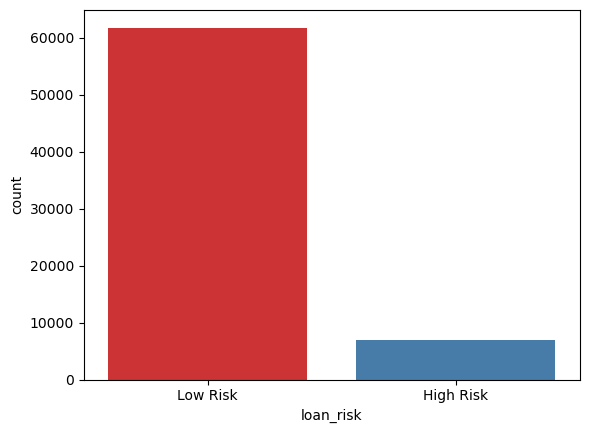

In [45]:
sns.countplot(x='loan_risk', data=df, hue= 'loan_risk', palette='Set1')

In [46]:
contingency_table = pd.crosstab(df['loan_risk'], df['target'])
print("Contingency Table:")
print(contingency_table)

Contingency Table:
target         0    1
loan_risk            
High Risk   6137  738
Low Risk   61259  520


In [47]:
chi2, p, dof, expected_frequencies = chi2_contingency(contingency_table)
print("\nExpected Frequencies:")
print(expected_frequencies)
print(f"\nChi-squared Statistic: {chi2:.2f}")
print(f"P-value: {p:.4f}")


Expected Frequencies:
[[ 6749.02409182   125.97590818]
 [60646.97590818  1132.02409182]]

Chi-squared Statistic: 3360.44
P-value: 0.0000


In [48]:
from scipy.stats import fisher_exact
if contingency_table.shape == (2, 2):
    high_vs_low = contingency_table.values
    odds_ratio, fisher_p = fisher_exact(high_vs_low)
    print(f"\nOdds Ratio: {odds_ratio:.2f}")
    print(f"P-value (Fisher's Exact Test): {fisher_p:.4f}")


Odds Ratio: 0.07
P-value (Fisher's Exact Test): 0.0000


#### Modeling with only loan risk

In [49]:
#using logistic regression and addressing the class imbalance with SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Step 1: Encode loan_risk as binary (if not already done)
df['loan_risk_encoded'] = df['loan_risk'].map({'Low Risk': 0, 'High Risk': 1})

# Define features and target
X = df[['loan_risk_encoded']]  # Only using loan_risk for now
y = df['target']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 2: Apply SMOTE to balance the classes
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

# Step 3: Train a Logistic Regression model on the resampled data
model = LogisticRegression()
model.fit(X_resampled, y_resampled)

# Step 4: Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Step 5: Evaluate the performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_prob)
print(f"\nAUC-ROC: {roc_auc:.4f}")

Confusion Matrix:
[[18427  1798]
 [  156   216]]

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     20225
           1       0.11      0.58      0.18       372

    accuracy                           0.91     20597
   macro avg       0.55      0.75      0.57     20597
weighted avg       0.98      0.91      0.94     20597


AUC-ROC: 0.7459


In [50]:
#using the random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix

# Step 1: Train Random Forest Classifier
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')  # Balanced weights for class imbalance
model_rf.fit(X_resampled, y_resampled)

# Step 2: Make predictions
y_pred_rf = model_rf.predict(X_test)
y_prob_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Step 3: Evaluate performance
print("\nConfusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

roc_auc_rf = roc_auc_score(y_test, y_prob_rf)
print(f"\nAUC-ROC (Random Forest): {roc_auc_rf:.4f}")


Confusion Matrix (Random Forest):
[[18427  1798]
 [  156   216]]

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     20225
           1       0.11      0.58      0.18       372

    accuracy                           0.91     20597
   macro avg       0.55      0.75      0.57     20597
weighted avg       0.98      0.91      0.94     20597


AUC-ROC (Random Forest): 0.7459


In [51]:
defaulting_by_loan_type = df.groupby(['loan_type', 'target'])['id'].count().reset_index(name='count')
total_loans_per_loan_type = defaulting_by_loan_type.groupby('loan_type')['count'].transform('sum')
defaulting_by_loan_type['percentage'] = ((defaulting_by_loan_type['count'] / total_loans_per_loan_type) * 100).round(1)

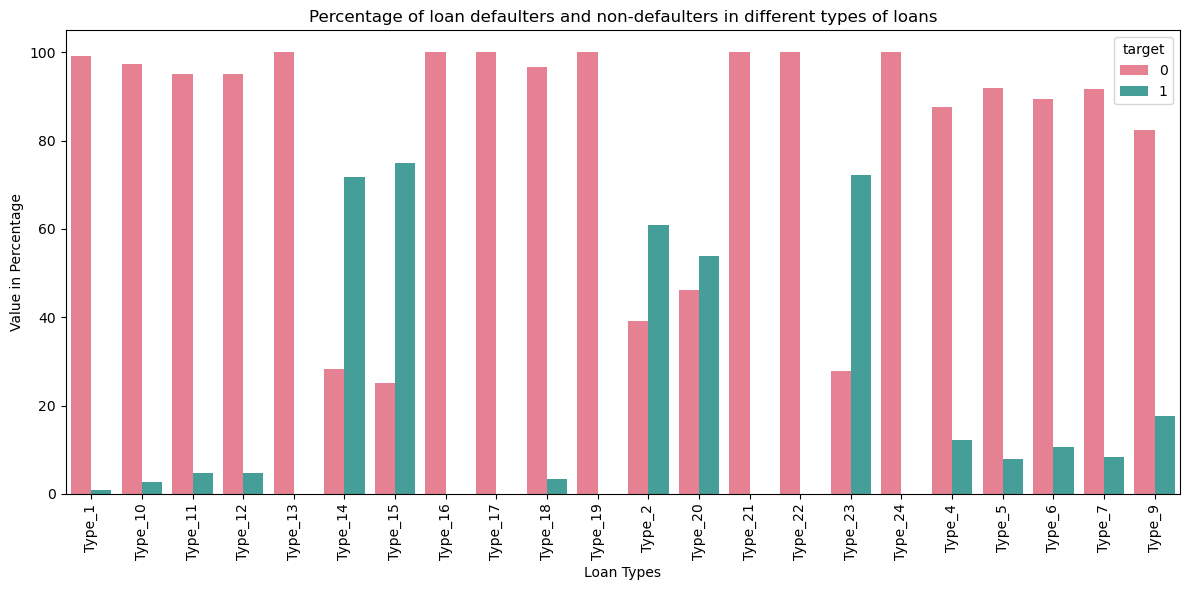

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(data=defaulting_by_loan_type,
            x = 'loan_type',
            y = 'percentage',
            hue = 'target',
            palette = 'husl')
plt.title('Percentage of loan defaulters and non-defaulters in different types of loans', fontsize=12)
plt.xlabel('Loan Types', fontsize=10)
plt.ylabel('Value in Percentage', fontsize=10)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Investigating loan duration

In [53]:
df['duration'].describe()

count    68654.000000
mean         8.544586
std         13.343145
min          1.000000
25%          7.000000
50%          7.000000
75%          7.000000
max       1096.000000
Name: duration, dtype: float64

In [54]:
print((df.groupby('duration').size().sort_values(ascending=False)).head(60))

duration
7       64973
14       1567
30        958
90        249
60        201
45        118
31         77
29         61
25         34
92         31
27         29
28         28
1          25
61         22
180        22
91         21
4          21
44         20
120        19
3          14
43         13
59         11
42         10
365        10
240         9
21          8
62          7
183         7
5           6
40          6
15          6
23          6
22          5
182         4
360         4
24          4
121         3
152         3
8           3
270         3
122         3
87          3
150         2
1096        2
20          2
2           2
36          2
17          2
26          2
57          2
334         1
912         1
905         1
548         1
366         1
273         1
300         1
16          1
243         1
12          1
dtype: int64


In [55]:
print(df.groupby('duration')['target'].mean().sort_values(ascending=False).head(60))

duration
300    1.000000
334    1.000000
153    1.000000
243    1.000000
273    1.000000
366    1.000000
360    1.000000
240    0.888889
365    0.800000
182    0.750000
122    0.666667
180    0.454545
62     0.428571
120    0.421053
92     0.354839
270    0.333333
121    0.333333
23     0.333333
152    0.333333
61     0.272727
90     0.236948
91     0.190476
60     0.179104
30     0.156576
43     0.153846
183    0.142857
42     0.100000
14     0.082323
45     0.059322
31     0.051948
7      0.012174
150    0.000000
548    0.000000
905    0.000000
87     0.000000
912    0.000000
1      0.000000
59     0.000000
21     0.000000
3      0.000000
4      0.000000
5      0.000000
8      0.000000
9      0.000000
12     0.000000
15     0.000000
16     0.000000
17     0.000000
18     0.000000
20     0.000000
22     0.000000
57     0.000000
24     0.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     0.000000
32     0.000000
36     0.000000
Name: target, dtype: float64


Looks like the rate of defaulting increases with an increase in loan duration

In [56]:
df_loan_duration = df.groupby('duration')['target'].mean().sort_values(ascending=False).reset_index(name='default_rate')
print(df_loan_duration)

    duration  default_rate
0        300           1.0
1        334           1.0
2        153           1.0
3        243           1.0
4        273           1.0
..       ...           ...
59        36           0.0
60        40           0.0
61        44           0.0
62         2           0.0
63      1096           0.0

[64 rows x 2 columns]


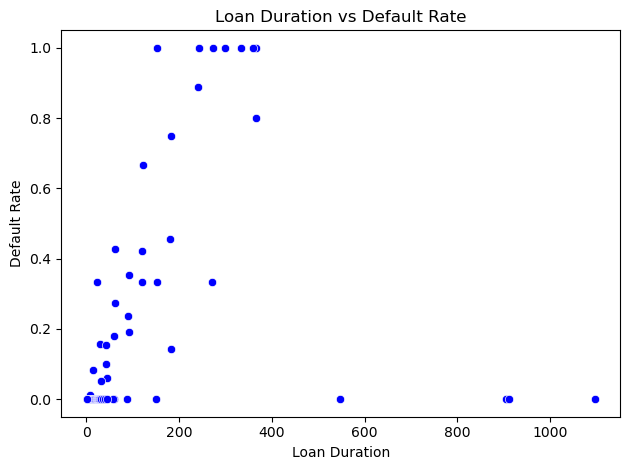

In [57]:
#scatter plot visualizing the relationship between loan duration and default rate
sns.scatterplot(data=df_loan_duration, x='duration', y='default_rate', color='blue')
plt.title('Loan Duration vs Default Rate')
plt.xlabel('Loan Duration')
plt.ylabel('Default Rate')
#plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('default_rate1.png', dpi=400, bbox_inches='tight')
plt.show()

In [58]:
df_count_default = df.groupby('duration').agg(
    count=('target', 'size'),
    default_rate=('target', 'mean')
).sort_values(by='duration').reset_index()
print(df_count_default.head())

   duration  count  default_rate
0         1     25           0.0
1         2      2           0.0
2         3     14           0.0
3         4     21           0.0
4         5      6           0.0


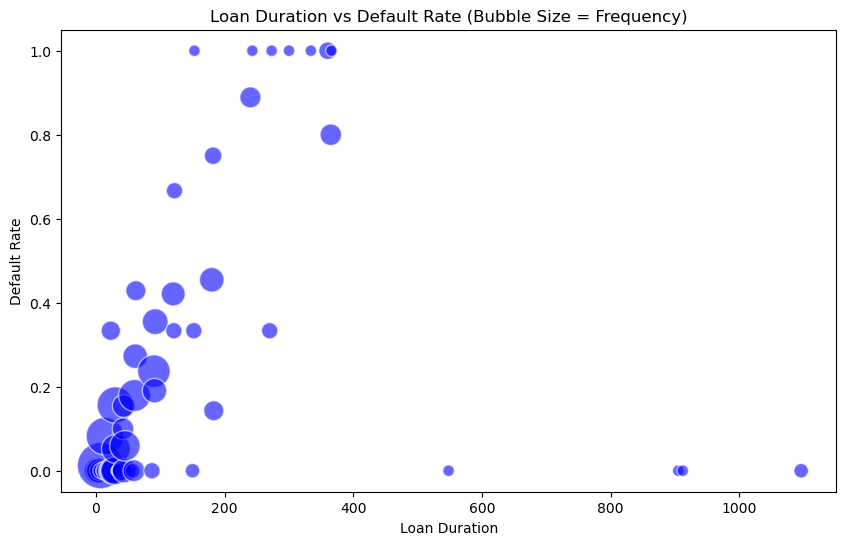

In [59]:
#bubble chart
df_count_default['scaled_count'] = np.log1p(df_count_default['count'])
plt.figure(figsize=(10, 6))
plt.scatter(df_count_default['duration'], df_count_default['default_rate'], 
            s=df_count_default['scaled_count'] * 100,
            color='blue', alpha=0.6, edgecolors='w')

plt.title('Loan Duration vs Default Rate (Bubble Size = Frequency)')
plt.xlabel('Loan Duration')
plt.ylabel('Default Rate')
plt.show()

In [60]:
#testing the observation that defaulting rate increases with an increase in loan duration
from scipy.stats import spearmanr
from scipy.stats import mannwhitneyu

# Calculate Spearman correlation between loan duration and default rate
stat, p_value = spearmanr(df_loan_duration['duration'], df_loan_duration['default_rate'])

# Display results
print(f"Spearman correlation coefficient: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant monotonic relationship between loan duration and default rate.")
else:
    print("No significant monotonic relationship between loan duration and default rate.")

Spearman correlation coefficient: 0.6014211748075481
P-value: 1.476257986035597e-07
There is a significant monotonic relationship between loan duration and default rate.


In [61]:
# Define the median duration as the threshold for short vs long loans
median_duration = df_loan_duration['duration'].median()

# Group 1: Loan durations below the median
group_1 = df_loan_duration[df_loan_duration['duration'] < median_duration]['default_rate']

# Group 2: Loan durations above the median
group_2 = df_loan_duration[df_loan_duration['duration'] > median_duration]['default_rate']

# Perform the Mann-Whitney U test
stat, p_value = mannwhitneyu(group_1, group_2)

print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant difference between the default rates of short and long loan durations.")
else:
    print("There is no significant difference between the default rates of short and long loan durations.")

U-statistic: 169.5
P-value: 7.517941026896663e-07
There is a significant difference between the default rates of short and long loan durations.


In [62]:
longterm_loans = df[df['duration'] > 365].reset_index(drop=True)
longterm_loans

,id,customer_id,country_id,tbl_loan_id,lender_id,loan_type,total_amount,total_amount_to_repay,disbursement_date,due_date,duration,new_versus_repeat,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid,target,loan_risk,loan_risk_encoded
0,ID_272658288728251804,272658,Kenya,288728,251804,Type_19,1542000.0,2374900.0,2022-10-27,2025-10-27,1096,Repeat Loan,250000.0,0.162127,385040.0,0,Low Risk,0
1,ID_273303306171267277,273303,Kenya,306171,267277,Type_19,514700.0,825465.0,2022-12-23,2025-06-22,912,Repeat Loan,7000.0,0.013600,11228.0,0,Low Risk,0
2,ID_272658288728267278,272658,Kenya,288728,267278,Type_19,1542000.0,2374900.0,2022-10-27,2025-10-27,1096,Repeat Loan,250000.0,0.162127,385040.0,0,Low Risk,0
3,ID_273343306348267277,273343,Kenya,306348,267277,Type_2,500000.0,664604.0,2023-01-12,2024-01-13,366,Repeat Loan,3000.0,0.006000,3988.0,1,High Risk,1
4,ID_273315306239267277,273315,Kenya,306239,267277,Type_19,515665.0,827290.0,2023-01-09,2025-07-02,905,New Loan,50000.0,0.096962,80216.0,0,Low Risk,0
5,ID_248114119236245684,248114,Kenya,119236,245684,Type_15,15000000.0,19748939.0,2022-02-23,2023-08-25,548,Repeat Loan,10000.0,0.000667,13166.0,0,High Risk,1


In [63]:
#excluding the loan durations with a frequency below 10
df_count_default.describe()

,duration,count,default_rate,scaled_count
count,64.000000,64.00000,64.000000,64.000000
mean,139.890625,1072.71875,0.230253,2.303747
std,219.871760,8117.54102,0.344401,1.876815
min,1.000000,1.00000,0.000000,0.693147
25%,21.750000,2.00000,0.000000,1.098612
50%,44.500000,5.50000,0.000000,1.868835
75%,159.750000,21.00000,0.333333,3.091042
max,1096.000000,64973.00000,1.000000,11.081742


In [64]:
high_freq = df_count_default[df_count_default['count'] >= 5].reset_index(drop=True)
print(high_freq)

    duration  count  default_rate  scaled_count
0          1     25      0.000000      3.258097
1          3     14      0.000000      2.708050
2          4     21      0.000000      3.091042
3          5      6      0.000000      1.945910
4          7  64973      0.012174     11.081742
5         14   1567      0.082323      7.357556
6         15      6      0.000000      1.945910
7         21      8      0.000000      2.197225
8         22      5      0.000000      1.791759
9         23      6      0.333333      1.945910
10        25     34      0.000000      3.555348
11        27     29      0.000000      3.401197
12        28     28      0.000000      3.367296
13        29     61      0.000000      4.127134
14        30    958      0.156576      6.865891
15        31     77      0.051948      4.356709
16        40      6      0.000000      1.945910
17        42     10      0.100000      2.397895
18        43     13      0.153846      2.639057
19        44     20      0.000000      3

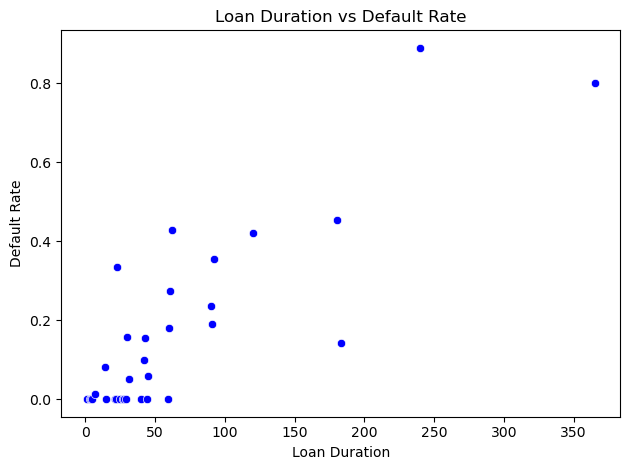

In [65]:
#scatter plot visualizing the relationship between loan duration and default rate
sns.scatterplot(data=high_freq, x='duration', y='default_rate', color='blue')
plt.title('Loan Duration vs Default Rate')
plt.xlabel('Loan Duration')
plt.ylabel('Default Rate')
#plt.xticks(rotation=90)
plt.tight_layout()
#plt.savefig('default_rate2.png', dpi=400, bbox_inches='tight' )
plt.show()

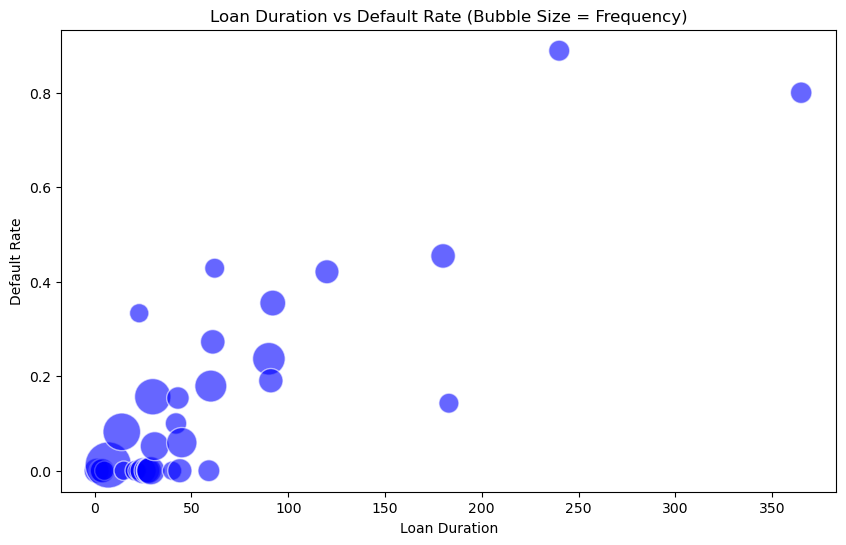

In [66]:
#bubble chart
plt.figure(figsize=(10, 6))
plt.scatter(high_freq['duration'], high_freq['default_rate'], s=high_freq['scaled_count'] * 100, color='blue', alpha=0.6, edgecolors='w')
plt.title('Loan Duration vs Default Rate (Bubble Size = Frequency)')
plt.xlabel('Loan Duration')
plt.ylabel('Default Rate')
plt.show()

In [67]:
#testing the observation that defaulting rate increases with an increase in loan duration (for high-frequency durations)
from scipy.stats import spearmanr
stat, p_value = spearmanr(high_freq['duration'], high_freq['default_rate'])

print(f"Spearman correlation coefficient: {stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant monotonic relationship between loan duration and default rate.")
else:
    print("No significant monotonic relationship between loan duration and default rate.")

Spearman correlation coefficient: 0.7512166047262642
P-value: 4.7242791078233783e-07
There is a significant monotonic relationship between loan duration and default rate.


In [68]:
median_duration = high_freq['duration'].median()
group_1 = high_freq[high_freq['duration'] <= median_duration]['default_rate']
group_2 = high_freq[high_freq['duration'] > median_duration]['default_rate']
stat, p_value = mannwhitneyu(group_1, group_2)
print(f"U-statistic: {stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference between the default rates of short and long loan durations.")
else:
    print("There is no significant difference between the default rates of short and long loan durations.")

U-statistic: 35.0
P-value: 0.0001657401428395018
There is a significant difference between the default rates of short and long loan durations.


##### There's a strong positive correlation between loan duration and defaulting rate

In [69]:
df.query('duration >= 365')[['duration', 'target']]

,duration,target
503,1096,0
8733,365,1
9045,365,0
9482,365,1
10243,912,0
19047,365,0
21900,365,1
22254,365,1
27479,1096,0
29069,366,1


#### Loan interest rates

In [70]:
df['total_amount'].describe()

count    6.865400e+04
mean     1.483683e+04
std      1.416499e+05
min      2.000000e+00
25%      2.295000e+03
50%      5.249000e+03
75%      1.145000e+04
max      2.300000e+07
Name: total_amount, dtype: float64

In [71]:
df['total_amount_to_repay'].describe()

count    6.865400e+04
mean     1.563993e+04
std      1.650784e+05
min      0.000000e+00
25%      2.329000e+03
50%      5.325000e+03
75%      1.165000e+04
max      2.541500e+07
Name: total_amount_to_repay, dtype: float64

In [72]:
df.columns

Index(['id', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',
       'loan_type', 'total_amount', 'total_amount_to_repay',
       'disbursement_date', 'due_date', 'duration', 'new_versus_repeat',
       'amount_funded_by_lender', 'lender_portion_funded',
       'lender_portion_to_be_repaid', 'target', 'loan_risk',
       'loan_risk_encoded'],
      dtype='object')

In [73]:
#calculationg the interest rate
df['interest_rate'] = ((df['total_amount_to_repay'] - df['total_amount']) / 
                         (df['total_amount'] * (df['duration'] / 365))) * 100
df = df[['id', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',	'loan_type', 'loan_risk', 'total_amount', 'total_amount_to_repay', 'interest_rate', 'disbursement_date', 'due_date', 'duration', 'amount_funded_by_lender', 'lender_portion_funded', 'lender_portion_to_be_repaid', 'new_versus_repeat', 'target']]
df.head()

,id,customer_id,country_id,tbl_loan_id,lender_id,loan_type,loan_risk,total_amount,total_amount_to_repay,interest_rate,disbursement_date,due_date,duration,amount_funded_by_lender,lender_portion_funded,lender_portion_to_be_repaid,new_versus_repeat,target
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,Low Risk,8448.0,8448.0,0.000000,2022-08-30,2022-09-06,7,120.85,0.014305,121.0,Repeat Loan,0
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,Low Risk,25895.0,25979.0,16.914462,2022-07-30,2022-08-06,7,7768.50,0.300000,7794.0,Repeat Loan,0
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,High Risk,6900.0,7142.0,182.877847,2024-09-06,2024-09-13,7,1380.00,0.200000,1428.0,Repeat Loan,0
3,ID_266004285009267278,266004,Kenya,285009,267278,Type_1,Low Risk,8958.0,9233.0,160.072401,2022-10-20,2022-10-27,7,2687.40,0.300000,2770.0,Repeat Loan,0
4,ID_253803305312267278,253803,Kenya,305312,267278,Type_1,Low Risk,4564.0,4728.0,187.366971,2022-11-28,2022-12-05,7,1369.20,0.300000,1418.0,Repeat Loan,0


In [74]:
df['interest_rate'].describe()

count    68654.000000
mean        96.894512
std        257.025454
min      -5214.285714
25%          0.000000
50%         40.109890
75%        142.345746
max      11288.223938
Name: interest_rate, dtype: float64

##### Creating interest rate bins based on data distribution

##### Creating interest rate bins based on domain thresholds

In [75]:
# Define the bins and labels
bins = [-float('inf'), 20, float('inf')]
labels = ['Normal', 'Exorbitant']
df['interest_rate_bin'] = pd.cut(df['interest_rate'], bins=bins, labels=labels)
#df = df[['id', 'customer_id', 'country_id', 'tbl_loan_id', 'lender_id',	'loan_type', 'loan_risk', 'total_amount', 'total_amount_to_repay', 'interest_rate', 'interest_rate_bin', 'disbursement_date', 'due_date', 'duration', 'amount_funded_by_lender', 'lender_portion_funded', 'lender_portion_to_be_repaid', 'new_versus_repeat', 'target']]

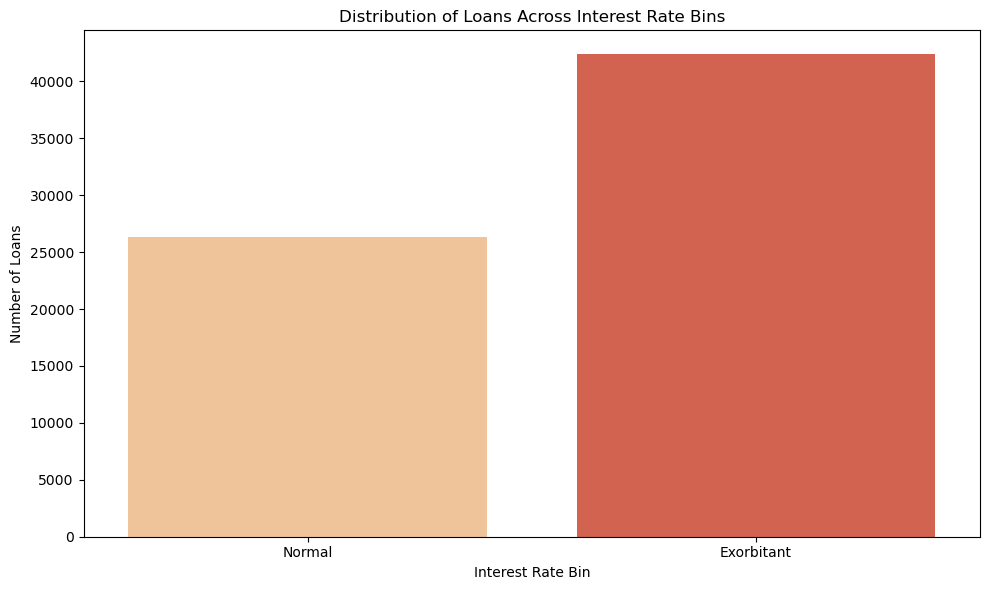

In [76]:
bin_distribution = df['interest_rate_bin'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=bin_distribution, x='interest_rate_bin', y='count', hue='interest_rate_bin', palette='OrRd')
plt.title('Distribution of Loans Across Interest Rate Bins', fontsize=12)
plt.xlabel('Interest Rate Bin', fontsize=10)
plt.ylabel('Number of Loans', fontsize=10)
plt.tight_layout()
plt.show()

In [77]:
print(f"There are {len(df[df['interest_rate'] == 0])} loan transactions with a 0% interest rate")

There are 24064 loan transactions with a 0% interest rate


In [78]:
df.groupby(['interest_rate_bin', 'target'], observed=True)['id'].count().reset_index(name='count')

,interest_rate_bin,target,count
0,Normal,0,26277
1,Normal,1,20
2,Exorbitant,0,41119
3,Exorbitant,1,1238


In [79]:
defaulting_rate_by_bin = df.groupby('interest_rate_bin', observed=True)['target'].mean().reset_index(name='defaulting_rate')
defaulting_rate_by_bin

,interest_rate_bin,defaulting_rate
0,Normal,0.000761
1,Exorbitant,0.029228


In [80]:
df_defaulted = df.query('target == 1').reset_index(drop=True)
df_non_defaulted = df.query('target == 0').reset_index(drop=True)

print(df_defaulted['interest_rate'].describe())
print(df_non_defaulted['interest_rate'].describe())

count     1258.000000
mean      1169.744728
std       1172.182737
min          0.000000
25%        183.143749
50%        575.648983
75%       2141.523023
max      11288.223938
Name: interest_rate, dtype: float64
count    67396.000000
mean        76.868908
std        140.649754
min      -5214.285714
25%          0.000000
50%         38.546817
75%        137.388681
max       3721.428571
Name: interest_rate, dtype: float64


In [81]:
print(df_defaulted['interest_rate_bin'].describe())
print(df_non_defaulted['interest_rate_bin'].describe())

count           1258
unique             2
top       Exorbitant
freq            1238
Name: interest_rate_bin, dtype: object
count          67396
unique             2
top       Exorbitant
freq           41119
Name: interest_rate_bin, dtype: object


In [82]:
#correlation between interest_rate and target
correlation = df['interest_rate'].corr(df['target'])
print(f"Correlation between interest rate and defaulting: {correlation:.2f}")

Correlation between interest rate and defaulting: 0.57


In [83]:
# correlation between interest_rate_bins and target
df['interest_rate_bin_encoded'] = df['interest_rate_bin'].cat.codes
correlation = df['interest_rate_bin_encoded'].corr(df['target'])
print(f"Correlation between interest_rate_bin and target: {correlation:.2f}")

Correlation between interest_rate_bin and target: 0.10


In [84]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(df['target'], df['interest_rate_bin_encoded'])
gini = 2 * auc - 1
print(f"Gini Index for interest_rate_bin: {gini:.2f}")

Gini Index for interest_rate_bin: 0.37


##### The negative interest rates

In [85]:
df_negative_rates = df[df['interest_rate'] < 0].reset_index(drop=True)
df_negative_rates.groupby('target').size()

target
0    72
dtype: int64

In [86]:
print(f" There are {len(df_negative_rates['lender_id'].unique())} lenders responsible for the negative intresest rates and these are; \n {df_negative_rates['lender_id'].unique()}")

 There are 2 lenders responsible for the negative intresest rates and these are; 
 [267278 251804]


In [87]:
print(f" These loans were given out on {len(df_negative_rates['disbursement_date'].unique())} different days")

 These loans were given out on 33 different days


In [88]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           68654 non-null  object  
 1   customer_id                  68654 non-null  int64   
 2   country_id                   68654 non-null  object  
 3   tbl_loan_id                  68654 non-null  int64   
 4   lender_id                    68654 non-null  int64   
 5   loan_type                    68654 non-null  object  
 6   loan_risk                    68654 non-null  object  
 7   total_amount                 68654 non-null  float64 
 8   total_amount_to_repay        68654 non-null  float64 
 9   interest_rate                68654 non-null  float64 
 10  disbursement_date            68654 non-null  object  
 11  due_date                     68654 non-null  object  
 12  duration                     68654 non-null  int64   
 13  a

#### Daily loan cost

In [89]:
df['daily_loan_cost'] = ((df['total_amount_to_repay'] - df['total_amount']) / df['duration'])
df['daily_loan_cost']

0         0.000000
1        12.000000
2        34.571429
3        39.285714
4        23.428571
           ...    
68649     7.857143
68650    12.428571
68651     0.000000
68652     0.000000
68653     0.000000
Name: daily_loan_cost, Length: 68654, dtype: float64

In [90]:
print(df['daily_loan_cost'].describe())

count    68654.000000
mean        31.106207
std        172.062538
min      -1426.879630
25%          0.000000
50%          4.714286
75%         24.000000
max      19407.200000
Name: daily_loan_cost, dtype: float64


In [91]:
bins2 = [-float('inf'), 0, 4, 24, float('inf')]
labels2 = ['Zero', 'Small', 'Moderate', 'High']
df['cost_category'] = pd.cut(df['daily_loan_cost'], bins=bins2, labels=labels2)

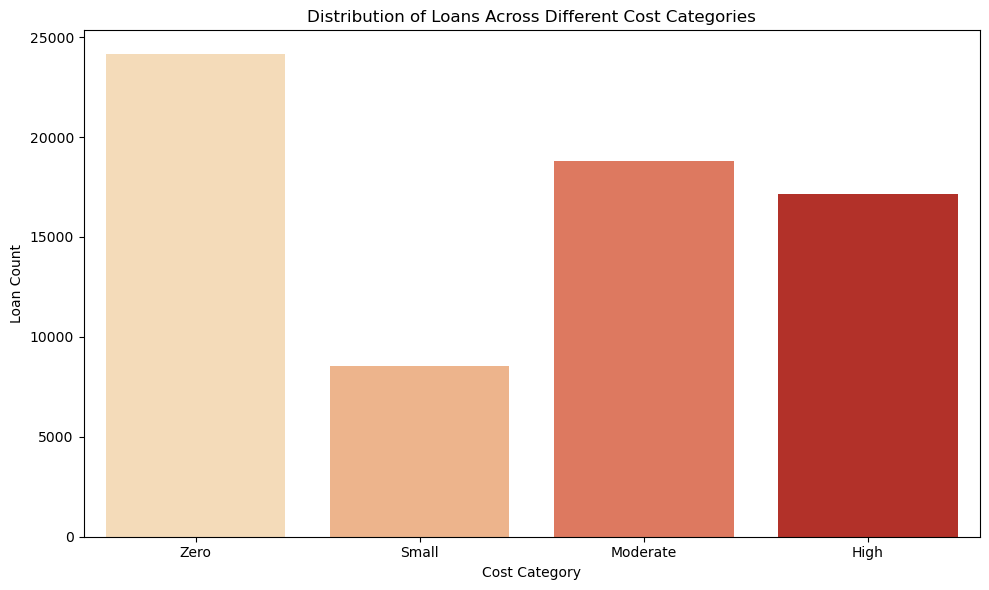

In [92]:
category_count = df['cost_category'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=category_count, x='cost_category', y='count', hue='cost_category', palette='OrRd')
plt.title('Distribution of Loans Across Different Cost Categories', fontsize=12)
plt.xlabel('Cost Category', fontsize=10)
plt.ylabel('Loan Count', fontsize=10)
plt.tight_layout()
plt.show()

In [93]:
df.groupby(['cost_category', 'target'], observed=True)['id'].count().reset_index(name='count')

,cost_category,target,count
0,Zero,0,24135
1,Zero,1,1
2,Small,0,8540
3,Small,1,2
4,Moderate,0,18797
5,Moderate,1,28
6,High,0,15924
7,High,1,1227


In [94]:
defaulting_rate_by_cost_category = df.groupby('cost_category', observed=True)['target'].mean().reset_index(name='defaulting_rate')
defaulting_rate_by_cost_category

,cost_category,defaulting_rate
0,Zero,0.000041
1,Small,0.000234
2,Moderate,0.001487
3,High,0.071541


In [95]:
# Encode bins as numerical values
df['cost_category_encoded'] = df['cost_category'].cat.codes

# Calculate correlation
correlation = df['cost_category_encoded'].corr(df['target'])
print(f"Correlation between cost_category and target: {correlation:.2f}")

Correlation between cost_category and target: 0.18


In [96]:
# Calculate AUC and Gini Index
auc_cost_category = roc_auc_score(df['target'], df['cost_category_encoded'])
gini_cost_category = 2 * auc_cost_category - 1
print(f"Gini Index for cost_category: {gini_cost_category:.2f}")

Gini Index for cost_category: 0.75


#### Daily Payment Ratio

In [97]:
df['daily_payment_ratio'] = df['total_amount_to_repay'] / df['duration']
df['daily_payment_ratio'].describe()

count     68654.000000
mean       1457.297909
std        2585.744161
min           0.000000
25%         330.714286
50%         739.428571
75%        1534.500000
max      139642.857143
Name: daily_payment_ratio, dtype: float64

In [98]:
df.groupby('target')['daily_payment_ratio'].mean()

target
0    1440.761711
1    2343.206953
Name: daily_payment_ratio, dtype: float64

#### Total amount to repay scaling

<Axes: >

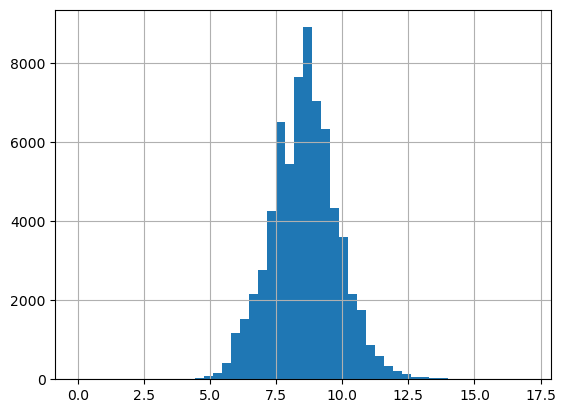

In [99]:
df['to_repay_log'] = np.log1p(df['total_amount_to_repay'])
df['to_repay_log'].hist(bins=50)

#### Investigating New Vs Repeat Customers

In [100]:
df.groupby('new_versus_repeat')['target'].mean()

new_versus_repeat
New Loan       0.209877
Repeat Loan    0.016729
Name: target, dtype: float64

In [101]:
defaulting_by_new = df.groupby(['new_versus_repeat', 'target'])['id'].count().reset_index(name='count')

In [102]:
total_loans_per_new = defaulting_by_new.groupby('new_versus_repeat')['count'].transform('sum')
defaulting_by_new['percentage'] = ((defaulting_by_new['count'] / total_loans_per_new) * 100).round(1)
print(defaulting_by_new)

  new_versus_repeat  target  count  percentage
0          New Loan       0    448        79.0
1          New Loan       1    119        21.0
2       Repeat Loan       0  66948        98.3
3       Repeat Loan       1   1139         1.7


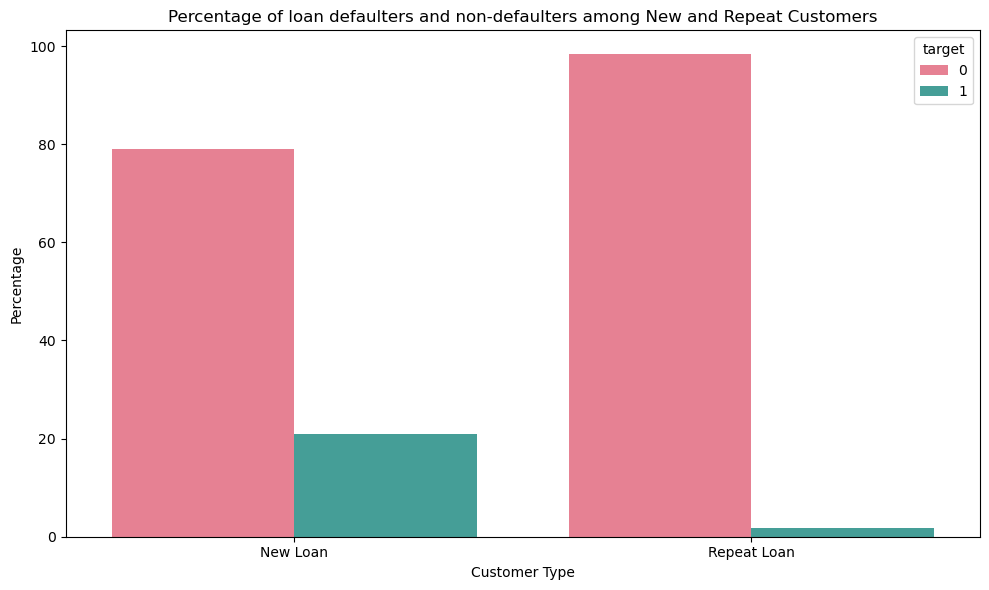

In [103]:
plt.figure(figsize=(10, 6))
sns.barplot(data=defaulting_by_new, x = 'new_versus_repeat', y = 'percentage', hue = 'target', palette = 'husl')
plt.title('Percentage of loan defaulters and non-defaulters among New and Repeat Customers', fontsize=12)
plt.xlabel('Customer Type',fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.tight_layout()
plt.show()

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           68654 non-null  object  
 1   customer_id                  68654 non-null  int64   
 2   country_id                   68654 non-null  object  
 3   tbl_loan_id                  68654 non-null  int64   
 4   lender_id                    68654 non-null  int64   
 5   loan_type                    68654 non-null  object  
 6   loan_risk                    68654 non-null  object  
 7   total_amount                 68654 non-null  float64 
 8   total_amount_to_repay        68654 non-null  float64 
 9   interest_rate                68654 non-null  float64 
 10  disbursement_date            68654 non-null  object  
 11  due_date                     68654 non-null  object  
 12  duration                     68654 non-null  int64   
 13  a

In [105]:
df.head(3)

,id,customer_id,country_id,tbl_loan_id,lender_id,loan_type,loan_risk,total_amount,total_amount_to_repay,interest_rate,...,lender_portion_to_be_repaid,new_versus_repeat,target,interest_rate_bin,interest_rate_bin_encoded,daily_loan_cost,cost_category,cost_category_encoded,daily_payment_ratio,to_repay_log
0,ID_266671248032267278,266671,Kenya,248032,267278,Type_1,Low Risk,8448.0,8448.0,0.000000,...,121.0,Repeat Loan,0,Normal,0,0.000000,Zero,0,1206.857143,9.041803
1,ID_248919228515267278,248919,Kenya,228515,267278,Type_1,Low Risk,25895.0,25979.0,16.914462,...,7794.0,Repeat Loan,0,Normal,0,12.000000,Moderate,2,3711.285714,10.165082
2,ID_308486370501251804,308486,Kenya,370501,251804,Type_7,High Risk,6900.0,7142.0,182.877847,...,1428.0,Repeat Loan,0,Exorbitant,1,34.571429,High,3,1020.285714,8.873888


<Axes: xlabel='new_versus_repeat', ylabel='count'>

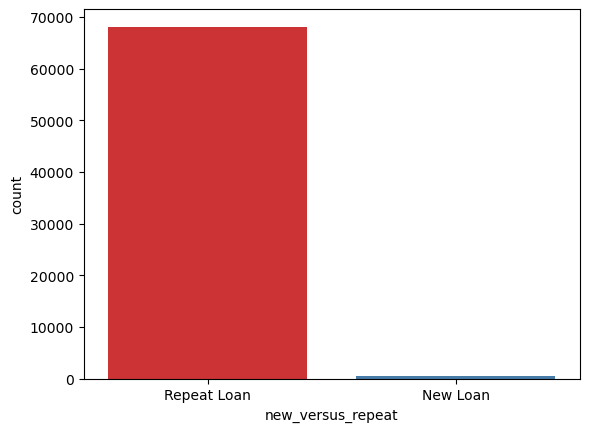

In [106]:
sns.countplot(x='new_versus_repeat', data=df, hue= 'new_versus_repeat', palette='Set1')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           68654 non-null  object  
 1   customer_id                  68654 non-null  int64   
 2   country_id                   68654 non-null  object  
 3   tbl_loan_id                  68654 non-null  int64   
 4   lender_id                    68654 non-null  int64   
 5   loan_type                    68654 non-null  object  
 6   loan_risk                    68654 non-null  object  
 7   total_amount                 68654 non-null  float64 
 8   total_amount_to_repay        68654 non-null  float64 
 9   interest_rate                68654 non-null  float64 
 10  disbursement_date            68654 non-null  object  
 11  due_date                     68654 non-null  object  
 12  duration                     68654 non-null  int64   
 13  a

#### Investigating dates

In [108]:
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'])
df['due_date'] = pd.to_datetime(df['due_date'])

In [109]:
df['disbursement_month'] = df['disbursement_date'].dt.month
df['disbursement_quarter'] = df['disbursement_date'].dt.quarter
df['due_month'] = df['due_date'].dt.month
df['due_quarter'] = df['disbursement_date'].dt.quarter

In [110]:
df['disbursement_date'] = df['disbursement_date'].dt.strftime('%Y-%m-%d')
df['due_date'] = df['due_date'].dt.strftime('%Y-%m-%d')

In [111]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68654 entries, 0 to 68653
Data columns (total 29 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   id                           68654 non-null  object  
 1   customer_id                  68654 non-null  int64   
 2   country_id                   68654 non-null  object  
 3   tbl_loan_id                  68654 non-null  int64   
 4   lender_id                    68654 non-null  int64   
 5   loan_type                    68654 non-null  object  
 6   loan_risk                    68654 non-null  object  
 7   total_amount                 68654 non-null  float64 
 8   total_amount_to_repay        68654 non-null  float64 
 9   interest_rate                68654 non-null  float64 
 10  disbursement_date            68654 non-null  object  
 11  due_date                     68654 non-null  object  
 12  duration                     68654 non-null  int64   
 13  a

In [112]:
df_defaulted = df.query('target == 1').reset_index(drop=True)
df_non_defaulted = df.query('target == 0').reset_index(drop=True)

<Axes: xlabel='disbursement_month', ylabel='count'>

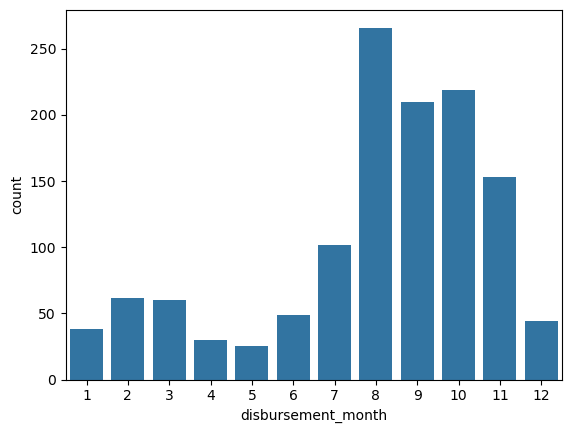

In [113]:
sns.countplot(x='disbursement_month', data=df_defaulted)

<Axes: xlabel='disbursement_month', ylabel='count'>

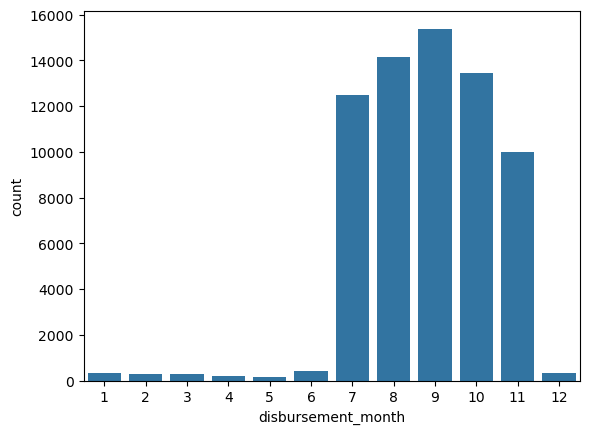

In [114]:
sns.countplot(x='disbursement_month', data=df_non_defaulted)

<Axes: xlabel='disbursement_quarter', ylabel='count'>

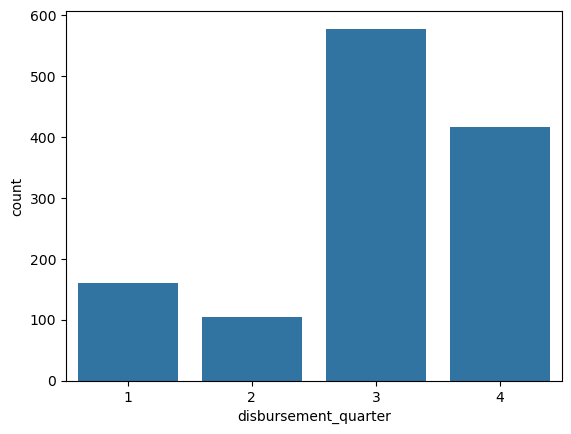

In [115]:
sns.countplot(x='disbursement_quarter', data=df_defaulted)

<Axes: xlabel='disbursement_quarter', ylabel='count'>

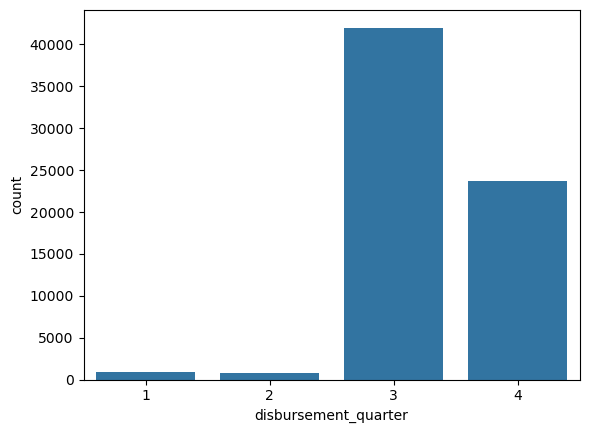

In [116]:
sns.countplot(x='disbursement_quarter', data=df_non_defaulted)

<Axes: xlabel='disbursement_month', ylabel='defaulting_rate'>

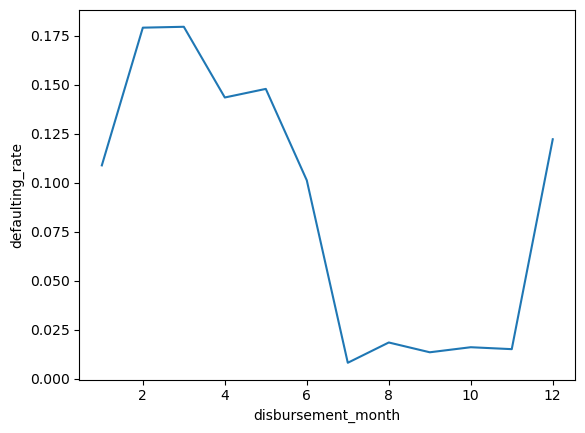

In [117]:
#rate of defaulting per month
df_month = df.groupby('disbursement_month')['target'].mean().reset_index(name='defaulting_rate')
sns.lineplot(x='disbursement_month', y='defaulting_rate', data=df_month)
#plt.savefig('lineplot01.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='disbursement_quarter', ylabel='defaulting_rate'>

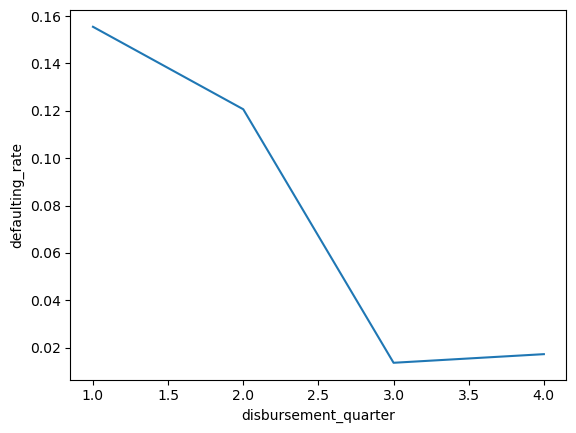

In [118]:
#rate of defaulting per quarter
df_month1 = df.groupby('disbursement_quarter')['target'].mean().reset_index(name='defaulting_rate')
sns.lineplot(x='disbursement_quarter', y='defaulting_rate', data=df_month1)
#plt.savefig('lineplot02.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='disbursement_quarter', ylabel='log_count'>

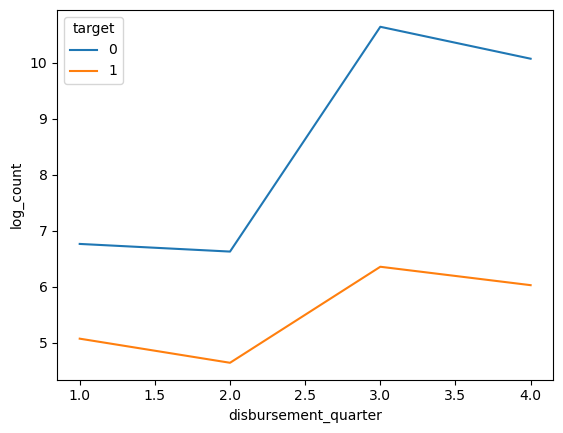

In [119]:
#log count of defaulters and non defaulters
df_month2 = df.groupby(['disbursement_quarter', 'target']).size().reset_index(name='count')
df_month2['log_count'] = np.log(df_month2['count'])
sns.lineplot(data=df_month2, x='disbursement_quarter', y='log_count', hue='target')
#plt.savefig('lineplot03.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='disbursement_month', ylabel='count'>

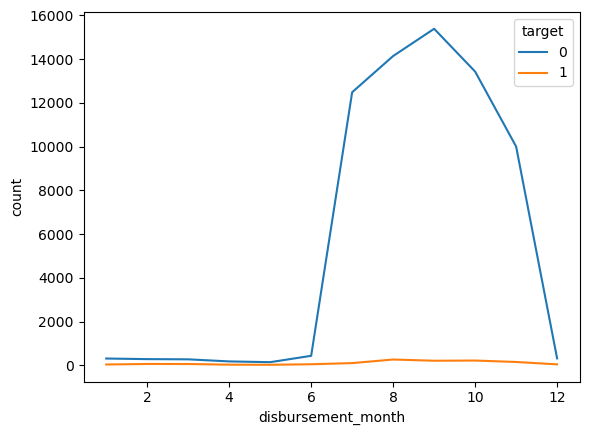

In [120]:
#count of defaulters and non defaulters
df_month3 = df.groupby(['disbursement_month', 'target']).size().reset_index(name='count')
df_month3['log_count'] = np.log(df_month3['count'])
sns.lineplot(data=df_month3, x='disbursement_month', y='count', hue='target')
#plt.savefig('lineplot04.png', dpi=300, bbox_inches='tight')

<Axes: xlabel='disbursement_month', ylabel='count'>

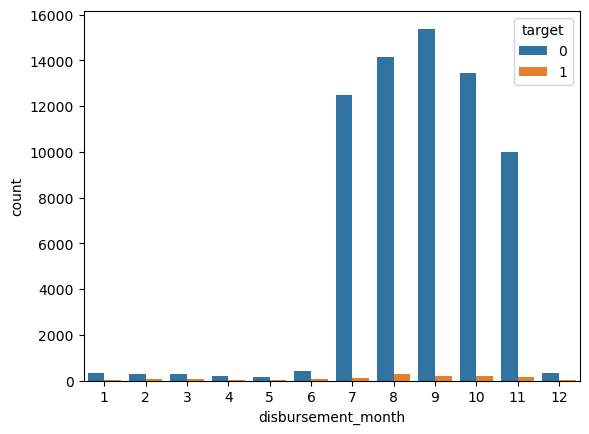

In [121]:
sns.countplot(data=df, x='disbursement_month', hue='target')

##### Testing the statistical significance of dibursement_quarter with prediction of loan defaulting

##### Relationship between disbursement_quarter, duration, and target

<Axes: xlabel='disbursement_month', ylabel='duration'>

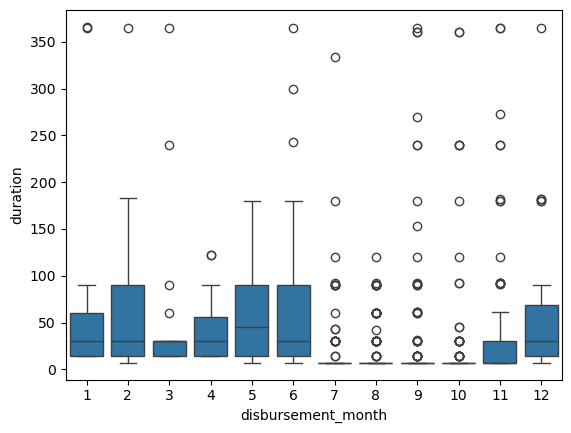

In [122]:
sns.boxplot(x='disbursement_month', y='duration', data=df_defaulted)

<Axes: xlabel='disbursement_month', ylabel='duration'>

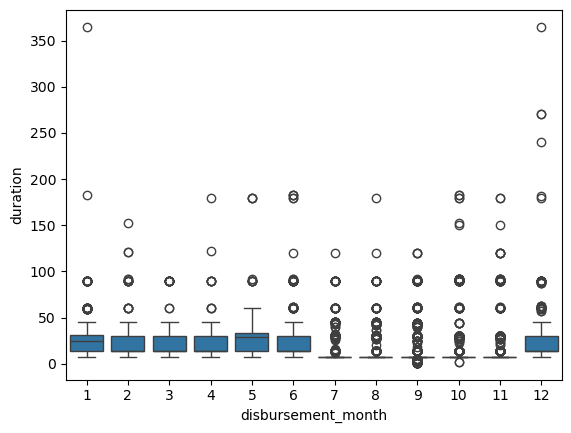

In [123]:
sns.boxplot(x='disbursement_month', y='duration', data=df_non_defaulted[df_non_defaulted['duration'] <= 366])

<Axes: xlabel='disbursement_quarter', ylabel='duration'>

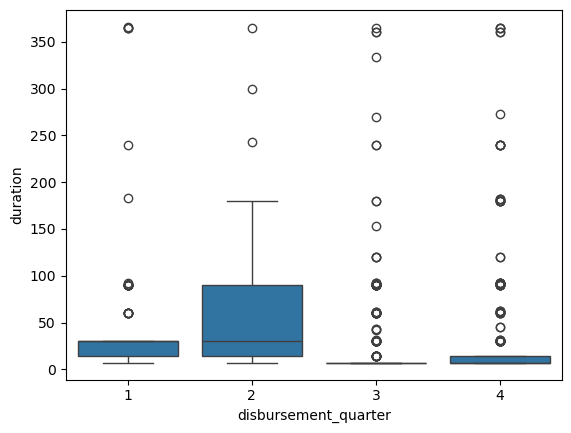

In [124]:
sns.boxplot(x='disbursement_quarter', y='duration', data=df_defaulted)

<Axes: xlabel='disbursement_quarter', ylabel='duration'>

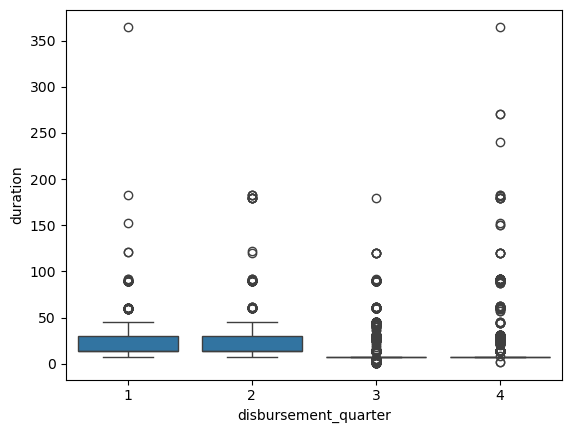

In [125]:
sns.boxplot(x='disbursement_quarter', y='duration', data=df_non_defaulted[df_non_defaulted['duration'] <= 365])

In [126]:
quarter_duration_grouped = df.groupby(['disbursement_month', 'duration'], observed=True)['target'].mean().reset_index(name='defaulting_rate')
print(quarter_duration_grouped)

     disbursement_month  duration  defaulting_rate
0                     1         7         0.000000
1                     1         8         0.000000
2                     1        14         0.095890
3                     1        15         0.000000
4                     1        21         0.000000
..                  ...       ...              ...
216                  12       182         0.666667
217                  12       240         0.000000
218                  12       270         0.000000
219                  12       365         0.500000
220                  12       912         0.000000

[221 rows x 3 columns]


##### Creating an interaction term between year quarters and duration, However, duration mut be binned first!

In [127]:
df['interaction1'] = df['disbursement_month'].astype(str) + '_' + df['duration'].astype(str)

In [128]:
interaction_df = df.groupby('interaction1').agg(
    count=('interaction1', 'size'),
    default_rate=('target', 'mean')
).sort_values(by=['count', 'default_rate'], ascending=[False, False]).reset_index()
interaction_df

,interaction1,count,default_rate
0,9_7,15198,0.011580
1,8_7,14133,0.015920
2,10_7,13313,0.014422
3,7_7,12312,0.006417
4,11_7,9784,0.010630
...,...,...,...
216,7_44,1,0.000000
217,8_180,1,0.000000
218,8_20,1,0.000000
219,9_18,1,0.000000


#### Risk Score

In [129]:
#df['duration_weeks'] = df['duration'] / 7
df['risk_score'] = np.where(
    (df['interest_rate'] < 0) | (df['lender_portion_to_be_repaid'] == 0.0),
    0.0,
    (df['interest_rate'] * df['total_amount_to_repay']) /
    (df['duration'] * df['lender_portion_to_be_repaid'])
)

#### Aggregating customers with more than one transaction

In [130]:
# flagging for customers with only one transaction
df['loan_count'] = df.groupby('customer_id')['tbl_loan_id'].transform('count')
df['is_single_loan'] = (df['loan_count'] == 1).astype(int)

# flagging for the last loan of multi-loan customers
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'])
df['is_last_loan'] = (
    (df['loan_count'] > 1) & 
    (df.groupby('customer_id')['disbursement_date'].transform('max') == df['disbursement_date'])
).astype(int)
df.drop(columns=['loan_count'], inplace=True)
df['disbursement_date'] = df['disbursement_date'].dt.strftime('%Y-%m-%d')

In [131]:
df.groupby('is_last_loan')['target'].mean()

is_last_loan
0    0.006708
1    0.132450
Name: target, dtype: float64

In [132]:
df.groupby('is_single_loan')['target'].mean()

is_single_loan
0    0.013760
1    0.272277
Name: target, dtype: float64

In [133]:
df.groupby(['new_versus_repeat', 'is_single_loan'])['target'].size()

new_versus_repeat  is_single_loan
New Loan           0                   384
                   1                   183
Repeat Loan        0                 67058
                   1                  1029
Name: target, dtype: int64

### Model Building

In [134]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import xgboost as xgb

def build_loan_default_model_refined(X, y):
    print("Starting refined hyperparameter tuning process...")
    
    # Step 1: Split the data
    print("\nStep 1: Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )
    
    # Step 2: Preprocessing (similar to the original process)
    print("Step 2: Preprocessing features...")
    
    X_train_processed = X_train.copy()
    X_test_processed = X_test.copy()
    
    # Handle numeric features
    numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
    imputer = SimpleImputer(strategy='median')
    scaler = StandardScaler()
    
    X_train_processed[numeric_features] = imputer.fit_transform(X_train_processed[numeric_features])
    X_test_processed[numeric_features] = imputer.transform(X_test_processed[numeric_features])
    
    X_train_processed[numeric_features] = scaler.fit_transform(X_train_processed[numeric_features])
    X_test_processed[numeric_features] = scaler.transform(X_test_processed[numeric_features])
    
    # Handle categorical features
    categorical_features = X.select_dtypes(include=['object']).columns
    if len(categorical_features) > 0:
        onehot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
        
        categorical_train = onehot.fit_transform(X_train_processed[categorical_features])
        categorical_test = onehot.transform(X_test_processed[categorical_features])
        
        categorical_feature_names = onehot.get_feature_names_out(categorical_features)
        
        categorical_train_df = pd.DataFrame(
            categorical_train, 
            columns=categorical_feature_names,
            index=X_train_processed.index
        )
        categorical_test_df = pd.DataFrame(
            categorical_test, 
            columns=categorical_feature_names,
            index=X_test_processed.index
        )
        
        X_train_processed = X_train_processed.drop(columns=categorical_features)
        X_test_processed = X_test_processed.drop(columns=categorical_features)
        
        X_train_processed = pd.concat([X_train_processed, categorical_train_df], axis=1)
        X_test_processed = pd.concat([X_test_processed, categorical_test_df], axis=1)
    
    # Step 3: Define refined parameter grid
    param_grid = {
        'max_depth': [7, 8, 9, 10, 11],
        'min_child_weight': [1, 2, 3],
        'subsample': [0.9, 0.95, 1.0],
        'colsample_bytree': [0.7, 0.75, 0.8, 0.85, 0.9],
        'learning_rate': [0.25, 0.3, 0.35],
        'n_estimators': [100, 150, 200],
        'scale_pos_weight': [len(y[y==0])/len(y[y==1])]  # Class imbalance handling
    }
    
    # Step 4: Initialize RandomizedSearchCV
    print("\nStep 4: Starting RandomizedSearchCV...")
    model = xgb.XGBClassifier(random_state=42)
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_grid,
        n_iter=50,  # Adjust to balance between exploration and runtime
        scoring='f1',
        cv=3,
        verbose=2,
        random_state=42,
        n_jobs=-1
    )
    
    # Step 5: Perform Randomized Search
    random_search.fit(X_train_processed, y_train)
    
    # Get the best model and parameters
    best_model = random_search.best_estimator_
    best_params = random_search.best_params_
    
    # Step 6: Evaluate on Test Set
    print("\nStep 6: Evaluating the best model...")
    y_pred = best_model.predict(X_test_processed)
    y_pred_proba = best_model.predict_proba(X_test_processed)[:, 1]
    
    feature_importance = pd.DataFrame({
        'feature': X_train_processed.columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    results = {
        'classification_report': classification_report(y_test, y_pred),
        'f1_score': f1_score(y_test, y_pred),
        'feature_importance': feature_importance,
        'best_parameters': best_params,
        'model': best_model,
        'y_test': y_test,
        'y_pred': y_pred
    }
    
    print("\nRefined hyperparameter tuning completed.")
    return results

X = df[['loan_type', 'total_amount_to_repay', 'interest_rate', 'duration', 
         'lender_portion_to_be_repaid', 'due_month', 'daily_loan_cost', 
         'daily_payment_ratio', 'risk_score', 'new_versus_repeat', 
         'is_last_loan', 'is_single_loan']]
y = df['target']

# Run the model
results = build_loan_default_model_refined(X, y)

Starting refined hyperparameter tuning process...

Step 1: Splitting data...
Step 2: Preprocessing features...

Step 4: Starting RandomizedSearchCV...
Fitting 3 folds for each of 50 candidates, totalling 150 fits

Step 6: Evaluating the best model...

Refined hyperparameter tuning completed.


##### Testing for multicollinearity

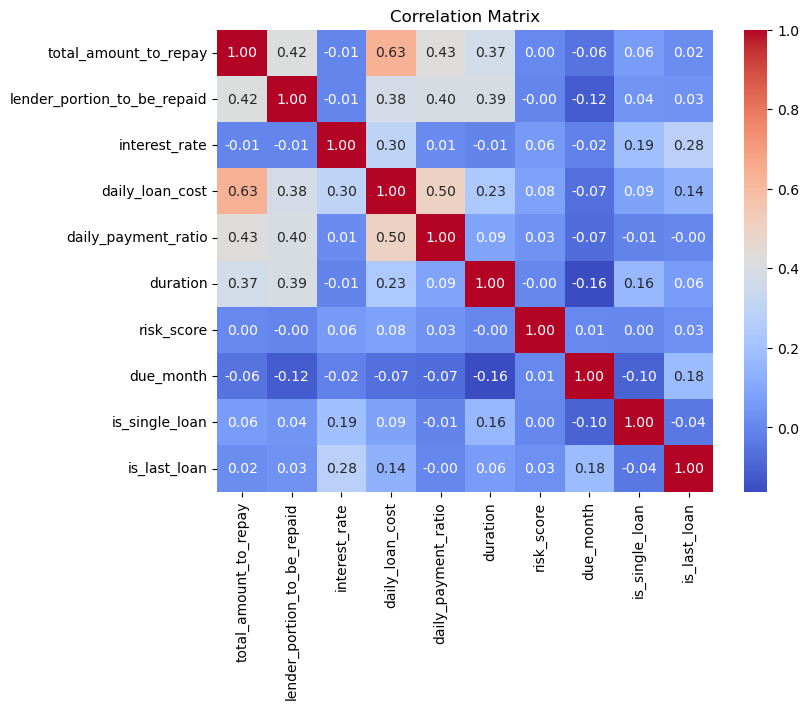

In [135]:
# numerical columns to check the correlation
numerical_columns = ['total_amount_to_repay', 'lender_portion_to_be_repaid', 'interest_rate', 'daily_loan_cost', 'daily_payment_ratio', 
                      'duration', 'risk_score', 'due_month', 'is_single_loan', 'is_last_loan']
correlation_matrix = df[numerical_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.savefig('corr_matrix1.png', dpi=400, bbox_inches='tight' )
plt.show()

In [136]:
#calculating VIF for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
features = ['total_amount_to_repay', 'lender_portion_to_be_repaid', 'interest_rate', 'daily_loan_cost', 'daily_payment_ratio', 
            'duration', 'risk_score', 'due_month', 'is_single_loan', 'is_last_loan']
X = add_constant(df[features])
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                        Feature        VIF
0                         const  35.180612
1         total_amount_to_repay   2.029807
2   lender_portion_to_be_repaid   1.464817
3                 interest_rate   1.329543
4               daily_loan_cost   2.279356
5           daily_payment_ratio   1.504545
6                      duration   1.363000
7                    risk_score   1.011705
8                     due_month   1.083066
9                is_single_loan   1.090302
10                 is_last_loan   1.158150


In [137]:
#Gini Index to test the predictive power of each feature
from sklearn.metrics import roc_auc_score
encoded_features = {}
for feature in features:
    encoded_features[feature] = df[feature] if df[feature].dtype != 'object' else df[feature].cat.codes
gini_results = {}
for feature in features:
    auc = roc_auc_score(df['target'], encoded_features[feature])
    gini_results[feature] = 2 * auc - 1
print("Gini Index for each feature:")
for feature, gini in gini_results.items():
    print(f"{feature}: {gini:.2f}")

Gini Index for each feature:
total_amount_to_repay: 0.32
lender_portion_to_be_repaid: 0.39
interest_rate: 0.80
daily_loan_cost: 0.88
daily_payment_ratio: 0.15
duration: 0.33
risk_score: 0.68
due_month: -0.14
is_single_loan: 0.25
is_last_loan: 0.59


In [138]:
#feature selection
df1 = df[['id', 'loan_type', 'total_amount_to_repay', 'interest_rate', 'duration', 'lender_portion_to_be_repaid', 'daily_loan_cost', 'new_versus_repeat', 
          'due_month', 'daily_payment_ratio', 'risk_score', 'is_last_loan', 'is_single_loan', 'target']]
#df1.to_csv('df1.csv')

#### Random Forest Classifier

In [139]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

X = df1[['loan_type', 'total_amount_to_repay', 'interest_rate', 'duration', 'lender_portion_to_be_repaid', 
         'due_month', 'daily_loan_cost', 'daily_payment_ratio', 'risk_score', 'new_versus_repeat', 'is_last_loan', 'is_single_loan']]
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_features = ['total_amount_to_repay', 'lender_portion_to_be_repaid', 'interest_rate', 'daily_loan_cost', 'daily_payment_ratio', 
                      'duration', 'risk_score', 'due_month']
categorical_features = ['loan_type', 'new_versus_repeat']
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)
best_params = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'max_features': 'sqrt',
    'class_weight': 'balanced'
}

rf_final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(**best_params, random_state=42))
])
rf_final_model.fit(X_train, y_train)
y_proba_tuned = rf_final_model.predict_proba(X_test)[:, 1]
threshold = 0.29
y_pred_tuned = (y_proba_tuned >= threshold).astype(int)
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
cm_table_tuned = pd.DataFrame(
    cm_tuned,
    index=['Actual 0', 'Actual 1'],
    columns=['Predicted 0', 'Predicted 1']
)

print(f"\nConfusion Matrix (Threshold = {threshold}):")
print(cm_table_tuned)
print(f"Classification Report (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_tuned))
print(f"AUC-ROC Score: {roc_auc_score(y_test, y_proba_tuned):.4f}")


Confusion Matrix (Threshold = 0.29):
          Predicted 0  Predicted 1
Actual 0        13442           45
Actual 1           12          232
Classification Report (Threshold = 0.29):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13487
           1       0.84      0.95      0.89       244

    accuracy                           1.00     13731
   macro avg       0.92      0.97      0.94     13731
weighted avg       1.00      1.00      1.00     13731

AUC-ROC Score: 0.9907


In [140]:
#5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_f1_scores = cross_val_score(
    rf_final_model, 
    X, 
    y, 
    cv=5, 
    scoring='f1',
    n_jobs=-1
)
print(f"Cross-Validation F1-Scores: {cv_f1_scores}")
print(f"Mean F1-Score: {cv_f1_scores.mean():.4f}")

Cross-Validation F1-Scores: [0.88247423 0.88659794 0.85653105 0.87083333 0.88372093]
Mean F1-Score: 0.8760


#### Saving the Model 

In [141]:
import joblib

# save the trained model
joblib.dump(rf_final_model, 'rf_final_model.pkl')

# Save the optimized threshold
best_threshold = 0.29
with open('optimized_threshold.txt', 'w') as f:
    f.write(str(best_threshold))

print("Model and threshold saved successfully.")

Model and threshold saved successfully.


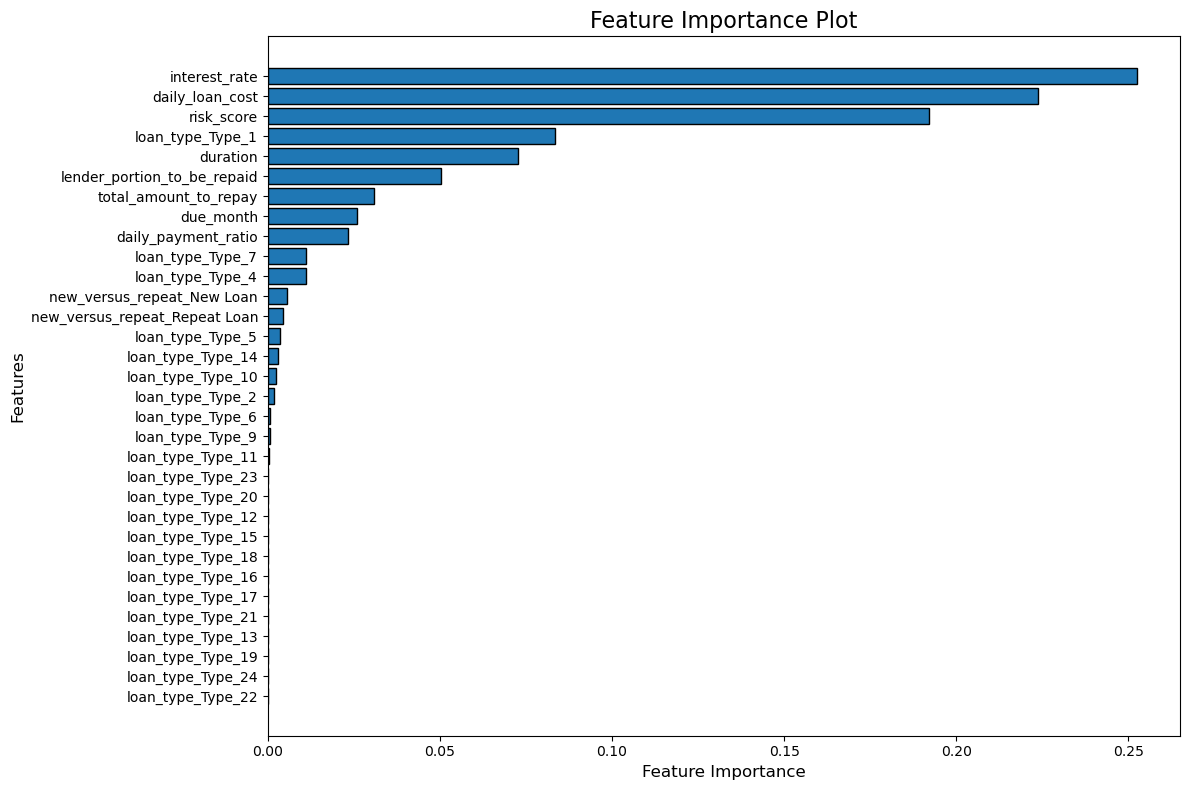

In [142]:
# Access the RandomForestClassifier in the pipeline
classifier_rf = rf_final_model.named_steps['classifier']

# Get feature importances from the RandomForestClassifier
importances = classifier_rf.feature_importances_

# Combine numerical and one-hot-encoded categorical feature names
categorical_feature_names = rf_final_model.named_steps['preprocessor'] \
    .transformers_[1][1].get_feature_names_out(categorical_features)
feature_names = numerical_features + list(categorical_feature_names)

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Sort features by importance for better visualization
feature_importance_df_sorted = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df_sorted['Feature'], feature_importance_df_sorted['Importance'], edgecolor='k')
plt.xlabel('Feature Importance', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importance Plot', fontsize=16)
plt.gca().invert_yaxis()  # Invert y-axis to show the most important features at the top
plt.tight_layout()
plt.show()

### Post Processing
##### Exploring the grouping less important loan types